Index(['z min', 'min distance', 'max distance', 'k strongest',
       'topic_filtered', 'radar_frameid', 'dataset', 'input_points_topic',
       'scan_registered_latest_topic', 'scan_registered_keyframe_topic',
       'odom_latest_topic', 'odom_keyframe_topic', 'use raw pointcloud',
       'submap keyframes', 'resolution r', 'resample factor f',
       'min. sensor distance [m]', 'min. sensor rot. [deg]', 'use keyframe',
       'use initial guess', 'radar reversed', 'disable registration',
       'soft velocity constraint', 'compensate', 'cost type',
       'todom_est_topic', 'gt_topic', 'est_output_dir', 'gt_output_dir',
       'sequence', 'job nr', 'nr_frames', 'Filtered points avg',
       'Filtered points dev [σ]', 'Filtered points count',
       'Surface points avg', 'Surface points dev [σ]', 'Surface points count',
       'Registration avg', 'Registration dev [σ]', 'Registration count',
       'Filtering avg', 'Filtering dev [σ]', 'Filtering count',
       'Trans.err. [%]', 'Rot.

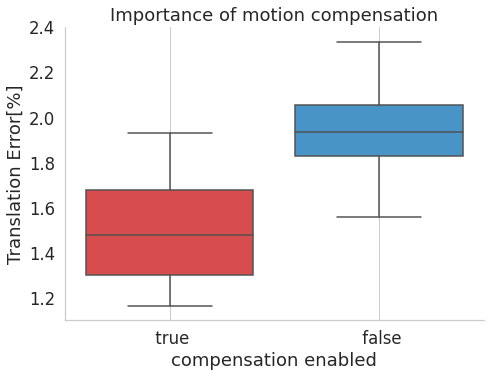

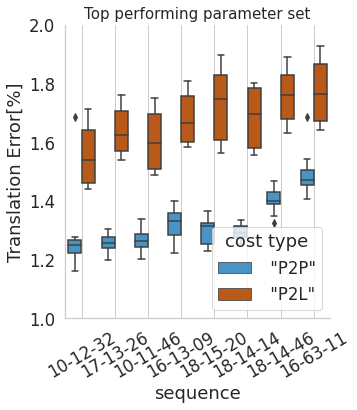

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats

sns.set_theme(style="ticks", color_codes=True)
sns.set(style="ticks")
sns.set(font_scale = 1.5)
sns.set_style("whitegrid")


colors_two = [ "#EE3636", "#3498DB"]
pal=sns.color_palette(colors_two)

dd = pd.read_csv('./2021-07-21_14-13_eval.csv', sep=r',', header=0)
print(dd.columns)
dd= dd.rename(columns={'Transl. Error': 'Trans.err. [%]'})
dd= dd.rename(columns={'resolution r': 'resolution r [m]'})
dd=dd.sort_values(by=["Trans.err. [%]"])
x=dd["sequence"].unique()
#print(x)
#w['sequence'] = w['sequence'].apply({'male':0, 'female':1}.get)

dd['sequence'] = dd['sequence'].apply({' 2019-01-10-12-32-52-radar-oxford-10k': '10-12-32',
 ' 2019-01-17-13-26-39-radar-oxford-10k': '17-13-26',
 ' 2019-01-10-11-46-21-radar-oxford-10k': '10-11-46',
 ' 2019-01-16-13-09-37-radar-oxford-10k': '16-13-09',
 ' 2019-01-18-15-20-12-radar-oxford-10k': '18-15-20',
 ' 2019-01-18-14-14-42-radar-oxford-10k': '18-14-14',
 ' 2019-01-18-14-46-59-radar-oxford-10k': '18-14-46',
 ' 2019-01-16-11-53-11-radar-oxford-10k': '16-63-11'}.get)
x=dd["sequence"].unique()
dd = dd.rename(columns={'Trans.err. [%]': 'Translation Error[%]'})
dd = dd.rename(columns={'compensate': 'compensation enabled'})

#ax = sns.catplot(x="compensate", y="Translation Error[%]", kind="boxen", dodge=True, data=df, legend_out=False, palette=pal,legend=True)

#print(dd.count)
dg=dd[dd["Translation Error[%]"] < 20 ]
df=dg[dg["submap keyframes"] >= 3]
#sns.jointplot(x="RPE [m]", y="Translation Error[%]", hue="compensate", data=df, palette=pal,legend=True)
#df=dd[dd["Translation Error[%]"] < 20]


#print(df["Translation Error[%]"])
#df[(np.abs(stdats.zscore(df)) < 3).all(axis=1)]
sns_plot=sns.catplot(x="compensation enabled", y="Translation Error[%]", kind="box", data=df, dodge=True, legend_out=False, palette=pal,height=5,aspect=1.4)

#sns_plot.set_xticklabels(["Men", "Women", "Children"])
plt.title('Importance of motion compensation')
plt.ylim(1.1,2.4)
plt.grid()
plt.show()


sns_plot.savefig('./output/Motion_compensation_sk=3.eps', format='eps')
sns_plot.savefig('./output/Motion_compensation_sk=3.png', format='png', dpi=1500)






dc=df[df["compensation enabled"] == " true"]


colors_two = [ "#3498DB", "#D35400"]
palp2pp2l=sns.color_palette(colors_two)

sns_plot=sns.catplot(x="sequence", y="Translation Error[%]", kind="box",hue="cost type", data=dc, dodge=True, legend_out=False, palette=palp2pp2l)
sns_plot.set_xticklabels(rotation=30)
plt.title('Top performing parameter set',fontsize=15)
plt.ylim(1.0,2)
plt.grid()


plt.show()

sns_plot.savefig('./output/best.eps', format='eps')
sns_plot.savefig('./output/best.png', format='png', dpi=1500)


